# ChildMind Dataset

### About the dataset

The EEG data used is a database collected and made available by the Child Mind Institute. 

It is part of the Multimodal Resource for Studying Information Processing in the Developing Brain (MIPDB) database.

MIPDB Link: http://fcon_1000.projects.nitrc.org/indi/cmi_eeg/

EEG Data Link: http://fcon_1000.projects.nitrc.org/indi/cmi_eeg/eeg.html


In [1]:
import os

import numpy as np
import pandas as pd
from scipy.stats import sem

In [2]:
# Import custom project related code
import sys
sys.path.append('../code')

from db import EEGDB
from utils import load_pickle

In [3]:
# Initialize project database object
db = EEGDB()
subjs = db.check_subjs()

## README

In [4]:
# Load data readme file
rmd_file = os.path.join(db.data_path, 'EEG', 'MIPDB_PublicFile.csv')
df = pd.read_csv(rmd_file)

In [5]:
# Check which subjects are downloaded
all_subjs = set(df.ID)

# Subjects with no data (info from README)
no_dat = ['A00052593', 'A00054122', 'A00055801', 'A00056158', 'A00056640', 'A00056990']

# Check if any subjects still need downloading
to_dl = all_subjs - set(subjs) - set(no_dat)

# Print out results
print('Number of subjects downloaded: ', len(set(subjs)))
print('Number of subjects left to download: ', len(to_dl))

Number of subjects downloaded:  120
Number of subjects left to download:  0


In [6]:
# Check the dataframe of database info
df.head()

,ID,Age,Sex,Adult Handedness,Child Handedness,EEG_resting,EYE_resting,EEG_SurrSupp_Block1,BEH_SurrSupp_Block1,EYE_SurrSupp_Block1,...,EEG_Contrast_Change_Block3,BEH_Contrast_Change_Block3,EYE_Contrast_Change_Block3,EEG_Sequence_Learning,BEH_Sequence_Learning,EYE_Sequence_Learning,EEG_Symbol_Search,BEH_Symbol_Search,EYE_Symbol_Search,DX_Status
0,A00051826,10,1,NaN,NaN,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,A00051886,12,1,NaN,NaN,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,A00051955,12,1,NaN,NaN,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
3,A00052593,11,2,NaN,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,A00053375,6,1,NaN,4.0,1,0,1,1,1,...,0,0,0,0,0,0,1,1,1,1


In [7]:
# Check distribution of sexes
print('Number of males: \t', sum(df.Sex == 1))
print('Number of females: \t', sum(df.Sex == 2))

Number of males: 	 69
Number of females: 	 57


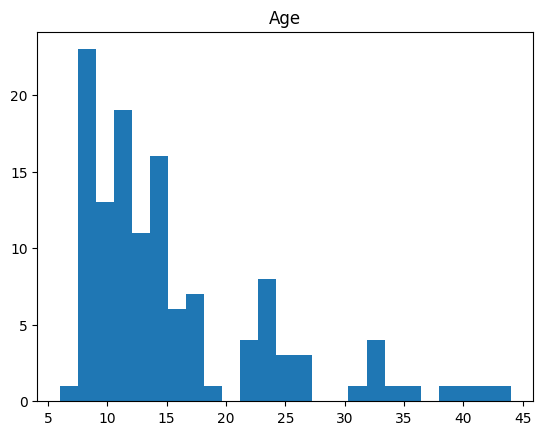

In [8]:
# Age distribution
df.hist('Age', grid=False, bins=25);

In [9]:
# Check the age range
print("Ages: {} - {}".format(min(df.Age), max(df.Age)))

Ages: 6 - 44


## EEG Info

In [10]:
# Load the file of interpolated channels
interp_chs = load_pickle('childmind_interp_chs.p')

In [11]:
# Get the number of interpolated channels per subject
n_interp = [len(val) for val in interp_chs.values()]

In [12]:
# Check info on interpolated channels
print('Average number of interpolated: \t{:1.4f}'.format(np.mean(n_interp)))
print('Standard error of the mean: \t\t{:1.4f}'.format(sem(n_interp)))

Average number of interpolated: 	4.8120
Standard error of the mean: 		0.1491
